In [2]:
from __future__ import print_function
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#シード値を固定
np.random.seed(1671)

In [15]:
# 定数を定義
NB_EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
OPTIMIZER = SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2
DROPOUT = 0.5

In [16]:
# データ・セットをロードする
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [17]:
RESHAPED = 32 * 32 * 3
X_train = X_train.reshape(50000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [18]:
# 画素値を0-1に変換
X_train /= 255.0
X_test /= 255.0

In [19]:
# クラスラベル（0-9）をone-hotエンコーディング形式に変換
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [20]:
# モデルの定義
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))

model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))

model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               393344    
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
__________

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

In [22]:
# コールバックの設定
earlystopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
callbacks = [earlystopping]

In [23]:
hist = model.fit(X_train, Y_train,
          batch_size=BATCH_SIZE, 
          epochs=NB_EPOCH,
          verbose=VERBOSE, 
          callbacks=callbacks,
          validation_split=VALIDATION_SPLIT)

Train on 40000 samples, validate on 10000 samples
Epoch 1/200
40000/40000 [==============================] - 4s 100us/step - loss: 2.2652 - acc: 0.1487 - val_loss: 2.1612 - val_acc: 0.2311
Epoch 2/200
40000/40000 [==============================] - 4s 94us/step - loss: 2.1749 - acc: 0.1931 - val_loss: 2.0724 - val_acc: 0.2694
Epoch 3/200
40000/40000 [==============================] - 4s 94us/step - loss: 2.1139 - acc: 0.2194 - val_loss: 2.0102 - val_acc: 0.3074
Epoch 4/200
40000/40000 [==============================] - 4s 94us/step - loss: 2.0665 - acc: 0.2390 - val_loss: 1.9694 - val_acc: 0.3311
Epoch 5/200
40000/40000 [==============================] - 4s 95us/step - loss: 2.0335 - acc: 0.2525 - val_loss: 1.9242 - val_acc: 0.3135
Epoch 6/200
40000/40000 [==============================] - 4s 103us/step - loss: 2.0012 - acc: 0.2723 - val_loss: 1.8890 - val_acc: 0.3350
Epoch 7/200
40000/40000 [==============================] - 4s 103us/step - loss: 1.9847 - acc: 0.2791 - val_loss: 1.8758

40000/40000 [==============================] - 4s 101us/step - loss: 1.6739 - acc: 0.4025 - val_loss: 1.5808 - val_acc: 0.4577
Epoch 60/200
40000/40000 [==============================] - 4s 98us/step - loss: 1.6646 - acc: 0.4047 - val_loss: 1.5763 - val_acc: 0.4493
Epoch 61/200
40000/40000 [==============================] - 4s 100us/step - loss: 1.6634 - acc: 0.4040 - val_loss: 1.5859 - val_acc: 0.4471
Epoch 62/200
40000/40000 [==============================] - 4s 100us/step - loss: 1.6637 - acc: 0.4068 - val_loss: 1.6017 - val_acc: 0.4349
Epoch 63/200
40000/40000 [==============================] - 4s 100us/step - loss: 1.6577 - acc: 0.4070 - val_loss: 1.5571 - val_acc: 0.4592
Epoch 64/200
40000/40000 [==============================] - 4s 101us/step - loss: 1.6544 - acc: 0.4105 - val_loss: 1.5714 - val_acc: 0.4537
Epoch 65/200
40000/40000 [==============================] - 4s 102us/step - loss: 1.6573 - acc: 0.4066 - val_loss: 1.5725 - val_acc: 0.4542
Epoch 66/200
40000/40000 [========

40000/40000 [==============================] - 5s 114us/step - loss: 1.5538 - acc: 0.4456 - val_loss: 1.5087 - val_acc: 0.4641
Epoch 118/200
40000/40000 [==============================] - 5s 113us/step - loss: 1.5483 - acc: 0.4472 - val_loss: 1.4964 - val_acc: 0.4759
Epoch 119/200
40000/40000 [==============================] - 5s 113us/step - loss: 1.5563 - acc: 0.4409 - val_loss: 1.4880 - val_acc: 0.4707
Epoch 120/200
40000/40000 [==============================] - 5s 119us/step - loss: 1.5504 - acc: 0.4427 - val_loss: 1.4821 - val_acc: 0.4777
Epoch 121/200
40000/40000 [==============================] - 5s 116us/step - loss: 1.5550 - acc: 0.4432 - val_loss: 1.4807 - val_acc: 0.4836
Epoch 122/200
40000/40000 [==============================] - 4s 112us/step - loss: 1.5488 - acc: 0.4460 - val_loss: 1.4948 - val_acc: 0.4736
Epoch 123/200
40000/40000 [==============================] - 5s 113us/step - loss: 1.5435 - acc: 0.4429 - val_loss: 1.4865 - val_acc: 0.4799
Epoch 124/200
40000/40000 [

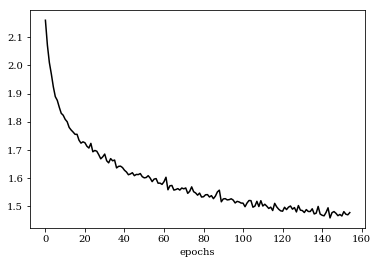

In [24]:
'''
学習の進み具合を可視化
'''
acc = hist.history['val_acc']
loss = hist.history['val_loss']

plt.rc('font', family='serif')
fig = plt.figure()
plt.plot(range(len(loss)), loss,
         label='loss', color='black')
plt.xlabel('epochs')
plt.show()

In [25]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 99us/step

Test score: 1.4535126182556153
Test accuracy: 0.481
